## Proyecto Final Elementos Computacionales
# Contraste Sociodemográfico por Sexo en las Defunciones por Suicidio Registradas en Yucatán, 2024

* Mathias Gomez
* Geiler Chablé

## 1. Preparación y carga de datos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar base de datos y filtrar
data = pd.read_csv('conjunto_de_datos_suicidios24.csv')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8907 entries, 0 to 8906
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ent_regis   8907 non-null   int64  
 1   mun_regis   8907 non-null   int64  
 2   loc_regis   8907 non-null   int64  
 3   ent_resid   8907 non-null   int64  
 4   mun_resid   8907 non-null   int64  
 5   loc_resid   8907 non-null   int64  
 6   ent_ocurr   8907 non-null   int64  
 7   mun_ocurr   8907 non-null   int64  
 8   loc_ocurr   8907 non-null   int64  
 9   causa_def   8907 non-null   object 
 10  cod_adicio  8907 non-null   object 
 11  lista_mex   8907 non-null   int64  
 12  sexo        8907 non-null   int64  
 13  ent_nac     8907 non-null   int64  
 14  afromex     8907 non-null   int64  
 15  conindig    8907 non-null   int64  
 16  lengua      8907 non-null   int64  
 17  cve_lengua  8907 non-null   int64  
 18  nacionalid  8907 non-null   int64  
 19  edad        8907 non-null  

(8907, 50)

Las variables de interés elegidas son:

1. Escolaridad
2. Edad
3. Sexo
4. Estado Civil
5. Ocupación

Y el analísis se llevara acabo en Yucatán

In [3]:
# Filtrar datos para la entidad con código 31 y seleccionar columnas de interés.
df= data[data['ent_regis'] == 31][['ent_regis', 'escolarida', 'edad', 'sexo', 'edo_civil', 'ocupacion']]
df.head()

,ent_regis,escolarida,edad,sexo,edo_civil,ocupacion
8460,31,3,4063,1,5,71
8461,31,6,4042,1,9,998
8462,31,4,4025,1,1,71
8463,31,8,4023,1,4,998
8464,31,4,4039,1,6,110


## 2. Limpieza y transformacion de datos.

In [4]:
# Mapeo de datos para datos menores a 50 categorias
# Se crea un diccionario para mapear los valores numéricos a descripciones textuales
escolaridad_map = {1:'Sin escolaridad', 2:'Preescolar', 3:'Primaria incompleta', 4:'Primaria completa',
                   5:'Secundaria incompleta', 6:'Secundaria completa', 7:'Preparatoria o bachillerato incompleta', 8:'Preparatoria o bachillerato completa',
                   9:'Profesional', 10:'Posgrado', 88:'No aplica menores de 3 años', 99:'No especificado'}
sexo_map = {1:'Hombre', 2:'Mujer', 9:'No especificado'}  
edo_civil_map = {1:'Soltero(a)', 2:'Divorciado(a)', 3:'Viudo(a)', 4:'Union libre', 5:'Casado(a)', 6:'Separado(a)', 8:'No aplica menores 12 años', 9:'No especificado'}

# Aplicar el mapeo a las columnas correspondientes

df['escolarida'] = df['escolarida'].map(escolaridad_map)
df['sexo'] = df['sexo'].map(sexo_map)
df['edo_civil'] = df['edo_civil'].map(edo_civil_map)



In [5]:
# Left join para mapear ocupacion, estos datos tienen un manejo diferente ya que se utilizan mas de 50 categorias.
#se carga el catalogo de ocupaciones y se renombra la columna 'cve' a 'ocupacion' para hacer el merge
ocupacion_df = pd.read_csv('ocupacion.csv')
ocupacion_df['descrip'] = ocupacion_df['descrip'].astype('category')
ocupacion_df.rename(columns={'cve':'ocupacion'}, inplace=True)

# Realizar el left join para mapear los valores de edad
edad_valor = pd.read_csv('edad_int.csv')



In [6]:
# crear una copia del DataFrame original para evitar modificarlo directamente
df_limpio = df.copy()
# Realizar el left join para mapear las descripciones de ocupación
df_limpio = df_limpio.merge(ocupacion_df[['ocupacion', 'descrip']], on='ocupacion', how='left')
# Realizar el left join para mapear las descripciones de edad
df_limpio = df_limpio.merge(edad_valor[['edad', 'Valor']], on='edad', how='left')

In [7]:
#Renombrar columnas para mayor claridad
df_limpio.rename(columns={'descrip':'ocupacion_descripcion'}, inplace=True)
df_limpio.rename(columns={'Valor':'edad_int'}, inplace=True)

In [15]:
## Cambiar el tipo de datos de las columnas categóricas
df_limpio['escolarida'] = df_limpio['escolarida'].astype('category')
df_limpio['sexo'] = df_limpio['sexo'].astype('category')
df_limpio['edo_civil'] = df_limpio['edo_civil'].astype('category')
df_limpio['ocupacion_descripcion'] = df_limpio['ocupacion_descripcion'].astype('category')

# Para valor 0 en edad_int, rellenar con NaN y después rellenar con la media
df_limpio['edad_int'].replace(0, np.nan, inplace=True)
mean_edad = df_limpio['edad_int'].mean()
df_limpio['edad_int'].fillna(mean_edad, inplace=True) #Se rellena con la media en caso de valores no especificados.

C:\Users\geile\AppData\Local\Temp\ipykernel_1500\593349099.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio['edad_int'].replace(0, np.nan, inplace=True)
C:\Users\geile\AppData\Local\Temp\ipykernel_1500\593349099.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [16]:
# Primeras cinco columnas del DataFrame limpio
df_limpio.head()



,ent_regis,escolarida,edad,sexo,edo_civil,ocupacion,ocupacion_descripcion,edad_int
0,31,Primaria incompleta,4063,Hombre,Casado(a),71,Trabajadores en la extracción y la edificación...,63.0
1,31,Secundaria completa,4042,Hombre,No especificado,998,Ocupaciones insuficientemente especificadas,42.0
2,31,Primaria completa,4025,Hombre,Soltero(a),71,Trabajadores en la extracción y la edificación...,25.0
3,31,Preparatoria o bachillerato completa,4023,Hombre,Union libre,998,Ocupaciones insuficientemente especificadas,23.0
4,31,Primaria completa,4039,Hombre,Separado(a),110,No trabaja,39.0


In [26]:
# Información del DataFrame limpio
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ent_regis              331 non-null    int64   
 1   escolarida             331 non-null    category
 2   edad                   331 non-null    int64   
 3   sexo                   331 non-null    category
 4   edo_civil              331 non-null    category
 5   ocupacion              331 non-null    int64   
 6   ocupacion_descripcion  331 non-null    category
 7   edad_int               331 non-null    float64 
dtypes: category(4), float64(1), int64(3)
memory usage: 15.1 KB


## 3. Análisis estadístico descriptivo

In [27]:
# Analisis descriptivo edad
df_limpio['edad_int'].describe()


count    331.000000
mean      36.278788
std       14.446175
min       11.000000
25%       26.000000
50%       34.000000
75%       44.000000
max       96.000000
Name: edad_int, dtype: float64

In [28]:
# Analisis descriptivo escolaridad, tabla de frecuencias absolutas y relativas y porcentajes
escolaridad_freq = df_limpio['escolarida'].value_counts().sort_index()
escolaridad_rel_freq = df_limpio['escolarida'].value_counts(normalize=True).sort_index()
escolaridad_table = pd.DataFrame({'Frecuencia Absoluta': escolaridad_freq, 'Frecuencia Relativa': escolaridad_rel_freq, 'Porcentaje': escolaridad_rel_freq * 100})
escolaridad_table



,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje
escolarida,,,
No especificado,10,0.030211,3.021148
Preparatoria o bachillerato completa,24,0.072508,7.250755
Preparatoria o bachillerato incompleta,20,0.060423,6.042296
Primaria completa,63,0.190332,19.033233
Primaria incompleta,42,0.126888,12.688822
Profesional,31,0.093656,9.365559
Secundaria completa,100,0.302115,30.211480
Secundaria incompleta,31,0.093656,9.365559
Sin escolaridad,10,0.030211,3.021148


In [29]:
# Analisis descriptivo sexo, tabla de frecuencias absolutas y relativas y porcentajes
sexo_freq = df_limpio['sexo'].value_counts().sort_index()
sexo_rel_freq = df_limpio['sexo'].value_counts(normalize=True).sort_index()
sexo_table = pd.DataFrame({'Frecuencia Absoluta': sexo_freq, 'Frecuencia Relativa': sexo_rel_freq, 'Porcentaje': sexo_rel_freq * 100})
sexo_table

,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje
sexo,,,
Hombre,281,0.848943,84.89426
Mujer,50,0.151057,15.10574


In [30]:
# Analisis descriptivo ocupacion, tabla de frecuencias absolutas y relativas y porcentajes
ocupacion_freq = df_limpio['ocupacion_descripcion'].value_counts().sort_index()
ocupacion_rel_freq = df_limpio['ocupacion_descripcion'].value_counts(normalize=True).sort_index()
ocupacion_table = pd.DataFrame({'Frecuencia Absoluta': ocupacion_freq, 'Frecuencia Relativa': ocupacion_rel_freq, 'Porcentaje': ocupacion_rel_freq * 100})
# Mostrar solo las primeras 10, sort las mas frecuentes
ocupacion_table.sort_values(by='Frecuencia Absoluta', ascending=False).head(10)

,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje
ocupacion_descripcion,,,
No trabaja,74,0.223565,22.356495
Ocupaciones insuficientemente especificadas,69,0.208459,20.845921
Trabajadores en la extracción y la edificación de construcciones,67,0.202417,20.241692
Trabajadores en actividades agrícolas y ganaderas,19,0.057402,5.740181
Comerciantes en establecimientos,10,0.030211,3.021148
No especificada,9,0.027190,2.719033
"Trabajadores en actividades pesqueras, forestales, caza y similares",9,0.027190,2.719033
Conductores de transporte y de maquinaria móvil,9,0.027190,2.719033
Otros trabajadores artesanales no clasificados anteriormente,8,0.024169,2.416918


In [31]:
# Analisis descriptivo estado_civil, tabla de frecuencias absolutas y relativas y porcentajes
edo_civil_freq = df_limpio['edo_civil'].value_counts().sort_index()
edo_civil_rel_freq = df_limpio['edo_civil'].value_counts(normalize=True).sort_index()
edo_civil_table = pd.DataFrame({'Frecuencia Absoluta': edo_civil_freq, 'Frecuencia Relativa': edo_civil_rel_freq, 'Porcentaje': edo_civil_rel_freq * 100})
edo_civil_table


,Frecuencia Absoluta,Frecuencia Relativa,Porcentaje
edo_civil,,,
Casado(a),83,0.250755,25.075529
Divorciado(a),7,0.021148,2.114804
No aplica menores 12 años,3,0.009063,0.906344
No especificado,18,0.054381,5.438066
Separado(a),10,0.030211,3.021148
Soltero(a),133,0.401813,40.181269
Union libre,69,0.208459,20.845921
Viudo(a),8,0.024169,2.416918


In [32]:
# Metodo describe solo para variables categoricas
df_limpio[['escolarida', 'sexo', 'edo_civil', 'ocupacion_descripcion']].describe()

,escolarida,sexo,edo_civil,ocupacion_descripcion
count,331,331,331,331
unique,9,2,8,30
top,Secundaria completa,Hombre,Soltero(a),No trabaja
freq,100,281,133,74


### 3.2 Realizar Análisis por grupo.

In [33]:
#Análisis por grupo (escolaridad, promedio de edad)
analisis_edad_escolaridad = df_limpio.groupby('escolarida')['edad_int'].mean().sort_values(ascending=False)
analisis_edad_escolaridad

C:\Users\geile\AppData\Local\Temp\ipykernel_1500\2654969286.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_edad_escolaridad = df_limpio.groupby('escolarida')['edad_int'].mean().sort_values(ascending=False)


escolarida
Sin escolaridad                           47.600000
No especificado                           45.527879
Primaria incompleta                       44.428571
Profesional                               39.322581
Primaria completa                         36.888889
Preparatoria o bachillerato completa      36.000000
Secundaria completa                       33.480000
Preparatoria o bachillerato incompleta    31.600000
Secundaria incompleta                     26.580645
Name: edad_int, dtype: float64

In [34]:
#Análisis por grupo (sexo, promedio de edad)
analisis_sexo_edad = df_limpio.groupby('sexo')['edad_int'].mean().sort_values(ascending=False)
analisis_sexo_edad

C:\Users\geile\AppData\Local\Temp\ipykernel_1500\372876410.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_sexo_edad = df_limpio.groupby('sexo')['edad_int'].mean().sort_values(ascending=False)


sexo
Hombre    36.718861
Mujer     33.805576
Name: edad_int, dtype: float64

In [35]:
#Analisis de conteo del estado civil de hombres y mujeres
analisis_sexo_estado_civil = df_limpio.groupby(["sexo", "edo_civil"]).size().reset_index(name="conteo")
analisis_sexo_estado_civil

C:\Users\geile\AppData\Local\Temp\ipykernel_1500\2106621328.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_sexo_estado_civil = df_limpio.groupby(["sexo", "edo_civil"]).size().reset_index(name="conteo")


,sexo,edo_civil,conteo
0,Hombre,Casado(a),74
1,Hombre,Divorciado(a),6
2,Hombre,No aplica menores 12 años,2
3,Hombre,No especificado,15
4,Hombre,Separado(a),9
5,Hombre,Soltero(a),115
6,Hombre,Union libre,56
7,Hombre,Viudo(a),4
8,Mujer,Casado(a),9
9,Mujer,Divorciado(a),1


In [36]:
#Analisis de conteo del escolaridad por sexo
analisis_sexo_escolaridad = df_limpio.groupby(["sexo", "escolarida"]).size().reset_index(name="conteo")
analisis_sexo_escolaridad

C:\Users\geile\AppData\Local\Temp\ipykernel_1500\155957900.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_sexo_escolaridad = df_limpio.groupby(["sexo", "escolarida"]).size().reset_index(name="conteo")


,sexo,escolarida,conteo
0,Hombre,No especificado,6
1,Hombre,Preparatoria o bachillerato completa,20
2,Hombre,Preparatoria o bachillerato incompleta,17
3,Hombre,Primaria completa,59
4,Hombre,Primaria incompleta,36
5,Hombre,Profesional,23
6,Hombre,Secundaria completa,89
7,Hombre,Secundaria incompleta,24
8,Hombre,Sin escolaridad,7
9,Mujer,No especificado,4


In [37]:
#Analisis por sexo y su ocupacion de trabajo

analisis_ocupacion_escolaridad = df_limpio.groupby(["sexo", "ocupacion_descripcion"]).size().reset_index(name="conteo")
analisis_ocupacion_filtrado = analisis_ocupacion_escolaridad[analisis_ocupacion_escolaridad['conteo'] > 0]
analisis_ocupacion_filtrado

C:\Users\geile\AppData\Local\Temp\ipykernel_1500\584556333.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisis_ocupacion_escolaridad = df_limpio.groupby(["sexo", "ocupacion_descripcion"]).size().reset_index(name="conteo")


,sexo,ocupacion_descripcion,conteo
0,Hombre,Artesanos y trabajadores en el tratamiento y e...,7
3,Hombre,Artesanos y trabajadores en la elaboración de ...,6
4,Hombre,Auxiliares y técnicos en ciencias económico-ad...,1
5,Hombre,"Auxiliares y técnicos en ciencias exactas, bio...",7
7,Hombre,"Ayudantes de conductores de transporte, conduc...",1
10,Hombre,Comerciantes en establecimientos,10
11,Hombre,Conductores de transporte y de maquinaria móvil,9
18,Hombre,Empleados de ventas en establecimientos,2
23,Hombre,"Médicos, enfermeras y otros especialistas en s...",1
25,Hombre,No especificada,6


### 3.3 Cruces de variables

In [38]:
#Crear la nueva variable de intervalo 'grupo_edad'
df_limpio['grupo_edad'] = pd.cut(
    df_limpio['edad_int'],
    bins=[0, 18, df_limpio['edad_int'].max() + 1],
    right=False,  # El intervalo es [a, b) -> el límite inferior se incluye, el superior no
    labels=['Menor de 18 años', 'Mayor o igual a 18 años']
)

#Crear la Tabla de Contingencia
tabla_contingencia_1 = pd.crosstab(
    index=df_limpio['grupo_edad'],
    columns=df_limpio['sexo'],
    margins=True,          # Añade totales por fila y columna (margen)
    margins_name="Total"   # Nombre para la fila/columna de totales
)

# Mostrar la tabla de contingencia
print("Tabla de Contingencia: Distribución de Género por Grupo de Edad")
print(tabla_contingencia_1)

Tabla de Contingencia: Distribución de Género por Grupo de Edad
sexo                     Hombre  Mujer  Total
grupo_edad                                   
Menor de 18 años              9      6     15
Mayor o igual a 18 años     272     44    316
Total                       281     50    331


In [39]:
#Función para mapear los valores detallados a los grupos deseados
def agrupar_escolaridad(esc):
    """Mapea los valores detallados de escolaridad a categorías más amplias."""

    # Educación Básica
    if 'Primaria completa' in esc or 'Secundaria completa' in esc or 'Primaria Incompleta' in esc or "Secundaria Incompleta" in esc or 'Preparatoria o bachillerato incompleta' in esc:
        return 'Educación Básica'
    
    # Educación Media Superior
    elif 'Preparatoria o bachillerato completa' in esc:
        return 'Educación Media Superior'
    
    # Educación Superior
    elif 'Profesional' in esc:
        return 'Educación Superior'
        
    # Sin escolaridad y otros no clasificados
    elif 'Sin escolaridad' in esc:
        return 'Sin Escolaridad'
    
    else:
        return 'No especificado'


#Crear la nueva columna 'grupo_escolaridad' aplicando la función
df_limpio['grupo_escolaridad'] = df_limpio['escolarida'].apply(agrupar_escolaridad)

#Crear la Tabla de Contingencia
tabla_contingencia_escolaridad = pd.crosstab(
    index=df_limpio['grupo_escolaridad'],
    columns=df_limpio['sexo'],
    margins=True,          # Añade totales por fila y columna
    margins_name="Total"
)

# 4. Mostrar la tabla
print("Tabla de Contingencia: Distribución de Género por Grupo de Escolaridad")
print(tabla_contingencia_escolaridad)

#Tabla de Proporciones (Normalizada por Fila) ---
tabla_proporciones = pd.crosstab(
    index=df_limpio['grupo_escolaridad'],
    columns=df_limpio['sexo'],
    normalize='index' # Normaliza por fila (porcentaje de cada género dentro del grupo educativo)
)
print("\nTabla de Proporciones por Grupo de Escolaridad (Normalizada por Fila):")
# Muestra los resultados en porcentaje, redondeado a dos decimales
print((tabla_proporciones * 100).round(2).astype(str) + '%')

Tabla de Contingencia: Distribución de Género por Grupo de Escolaridad
sexo                      Hombre  Mujer  Total
grupo_escolaridad                             
Educación Básica             165     18    183
Educación Media Superior      20      4     24
Educación Superior            23      8     31
No especificado               66     17     83
Sin Escolaridad                7      3     10
Total                        281     50    331

Tabla de Proporciones por Grupo de Escolaridad (Normalizada por Fila):
sexo                      Hombre   Mujer
grupo_escolaridad                       
Educación Básica          90.16%   9.84%
Educación Media Superior  83.33%  16.67%
Educación Superior        74.19%  25.81%
No especificado           79.52%  20.48%
Sin Escolaridad            70.0%   30.0%


In [40]:
# Tabla de contingencia estado citivil y sexo
tabla_contingencia_edo_civil = pd.crosstab(
    index=df_limpio['edo_civil'], columns=df_limpio['sexo'])    
tabla_contingencia_edo_civil



sexo,Hombre,Mujer
edo_civil,,
Casado(a),74,9
Divorciado(a),6,1
No aplica menores 12 años,2,1
No especificado,15,3
Separado(a),9,1
Soltero(a),115,18
Union libre,56,13
Viudo(a),4,4


## 4. Visualización de resultados

C:\Users\geile\AppData\Local\Temp\ipykernel_1500\107707599.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(x='sexo', data=df_limpio, palette='viridis')


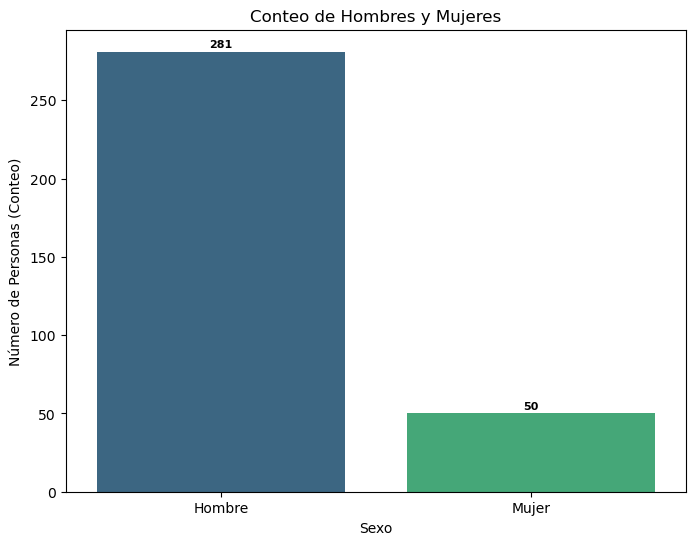

In [41]:
#Gráfico de Barras de Conteo de Hombres y Mujeres (Grafico de barras)

#Crear el gráfico de conteo usando seaborn
plt.figure(figsize=(8, 6)) # Define el tamaño de la figura (opcional)
ax= sns.countplot(x='sexo', data=df_limpio, palette='viridis')

#Añadir títulos y etiquetas
plt.title('Conteo de Hombres y Mujeres')
plt.xlabel('Sexo')
plt.ylabel('Número de Personas (Conteo)')

#Conteo en cada barra del gráfico
#Método .patches da acceso a las barras individuales del gráfico
for p in ax.patches:
    # ax.annotate es para agregar texto en el gráfico
    ax.annotate(f'{p.get_height():.0f}', # Texto a mostrar (altura de la barra, sin decimales)
                (p.get_x() + p.get_width() / 2., p.get_height()), # Posición X, Y del texto
                ha = 'center',           # Alineación horizontal: centrado
                va = 'center',           # Alineación vertical: centrado
                xytext = (0, 5),        # Desplazamiento del texto (10 puntos hacia arriba)
                textcoords = 'offset points',
                fontsize=8,             # Tamaño de la fuente
                fontweight='bold')       # Negrita (opcional)

#Mostrar la gráfica
plt.show()

C:\Users\geile\AppData\Local\Temp\ipykernel_1500\3450379148.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


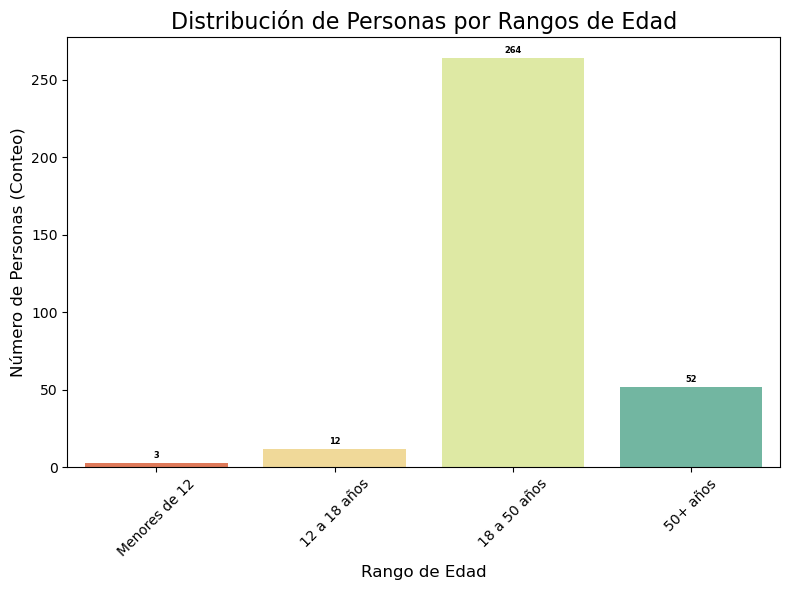

In [42]:
#Gráfico de barras de Conteo por Intervalos de Edad (Graficos de barras)

#Definir los límites de los intervalos (bins)
#Usamos 0 como límite inferior para la primera categoría y np.inf (infinito) para la última.
bins = [0, 12, 18, 50, np.inf]

#Definir las etiquetas de los intervalos (labels)
labels = ['Menores de 12', '12 a 18 años', '18 a 50 años', '50+ años']

#Crear la nueva columna categórica 'Rango_Edad'
#El parámetro 'right=False' asegura que el límite inferior sea inclusivo
df_limpio['Rango_Edad'] = pd.cut(
    df_limpio['edad_int'], 
    bins=bins, 
    labels=labels, 
    right=False
)

#Crear el gráfico de conteo
plt.figure(figsize=(8, 6)) 
ax = sns.countplot(
    x='Rango_Edad', 
    data=df_limpio, 
    palette='Spectral', # Un esquema de color diferente para mejor contraste
    order=labels        # Asegura que el orden de las barras sea el definido en las etiquetas
)

#Añadir títulos y etiquetas
plt.title('Distribución de Personas por Rangos de Edad', fontsize=16)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Número de Personas (Conteo)', fontsize=12)

#Agregar el conteo exacto sobre cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points',
                fontsize=6, 
                fontweight='bold')

#Mostrar la gráfica
plt.xticks(rotation=45) # Rota las etiquetas del eje X para mejor legibilidad
plt.tight_layout()      # Ajusta el diseño para que las etiquetas no se corten
plt.show()

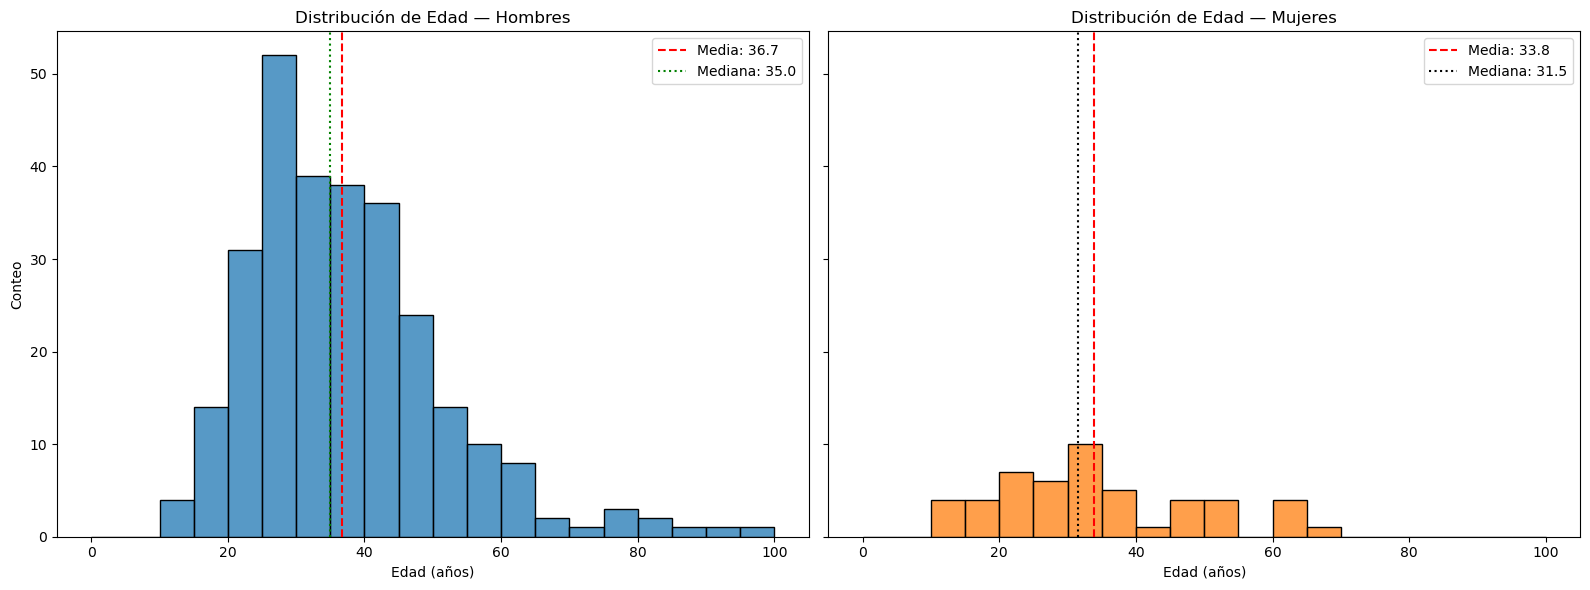

In [43]:
# Histogramas lado a lado: Hombres vs Mujeres (1 fila x 2 columnas)
hombres = df_limpio[df_limpio['sexo'] == 'Hombre']['edad_int']
mujeres = df_limpio[df_limpio['sexo'] == 'Mujer']['edad_int']

# Definir bins comunes (intervalos de 5 años)
max_edad = int(np.ceil(df_limpio['edad_int'].max()))
bins = np.arange(0, max_edad + 5, 5)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Hombres
sns.histplot(hombres, bins=bins, ax=axes[0], color='tab:blue', edgecolor='black')
axes[0].set_title('Distribución de Edad — Hombres')
axes[0].set_xlabel('Edad (años)')
axes[0].set_ylabel('Conteo')
if not hombres.empty:
    axes[0].axvline(hombres.mean(), color='red', linestyle='--', label=f'Media: {hombres.mean():.1f}')
    axes[0].axvline(hombres.median(), color='green', linestyle=':', label=f'Mediana: {hombres.median():.1f}')
    axes[0].legend()

# Mujeres
if not mujeres.empty:
    sns.histplot(mujeres, bins=bins, ax=axes[1], color='tab:orange', edgecolor='black')
    axes[1].set_title('Distribución de Edad — Mujeres')
    axes[1].set_xlabel('Edad (años)')
    axes[1].axvline(mujeres.mean(), color='red', linestyle='--', label=f'Media: {mujeres.mean():.1f}')
    axes[1].axvline(mujeres.median(), color='black', linestyle=':', label=f'Mediana: {mujeres.median():.1f}')
    axes[1].legend()
else:
    axes[1].text(0.5, 0.5, 'No hay registros para Mujeres', ha='center', va='center')
    axes[1].set_title('Distribución de Edad — Mujeres')
    axes[1].set_xlabel('Edad (años)')

plt.tight_layout()
plt.show()

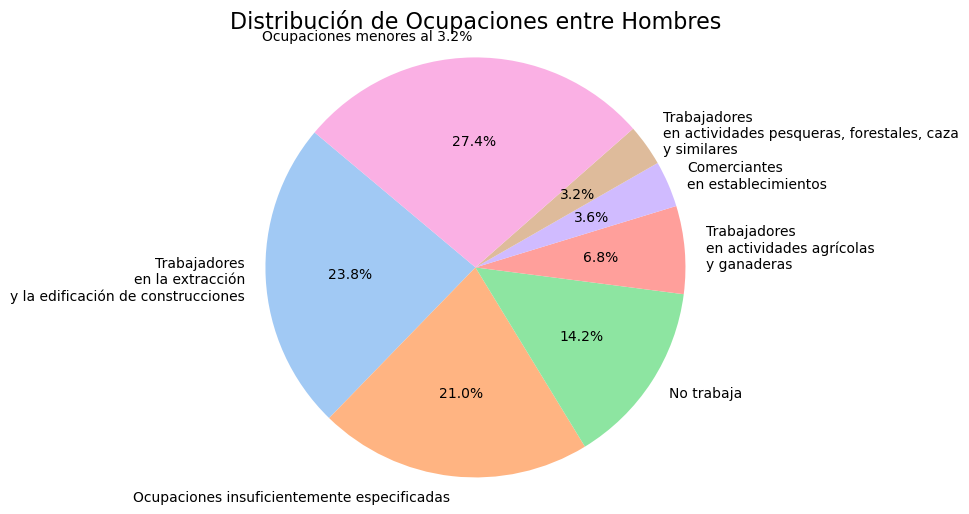

In [44]:
# Grafico de pastel ocupacion por sexo
# grafico para hombres donde solo se presentan las 6 ocupaciones mas comunes y el resto se agrupa en 'Otros'
ocupacion_hombres = df_limpio[df_limpio['sexo'] == 'Hombre']['ocupacion_descripcion']
ocupacion_hombres_counts = ocupacion_hombres.value_counts()
top_6_ocupaciones = ocupacion_hombres_counts.head(6)
otros = ocupacion_hombres_counts[6:].sum()

# --- NUEVA LÍNEA DE CÓDIGO AGREGADA ---
# Lista de etiquetas originales
etiquetas_originales = list(top_6_ocupaciones.index) + ['Ocupaciones menores al 3.2%']

# Formatear las etiquetas insertando '\n' donde sea necesario (ejemplo)
etiquetas_formateadas = [
    e.replace(' y ', '\ny ').replace(' en ', '\nen ')  # Se añade el salto de línea.
    for e in etiquetas_originales]
# Generar una paleta de colores con suficientes colores únicos
colores_unicos = sns.color_palette('pastel', n_colors=len(etiquetas_formateadas))
plt.figure(figsize=(8, 6))
plt.pie(
    list(top_6_ocupaciones) + [otros], 
    labels=etiquetas_formateadas, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors= colores_unicos
)
plt.title('Distribución de Ocupaciones entre Hombres', fontsize=16)
plt.axis('equal')  # Igualar los ejes para que el pastel sea circular



plt.show()


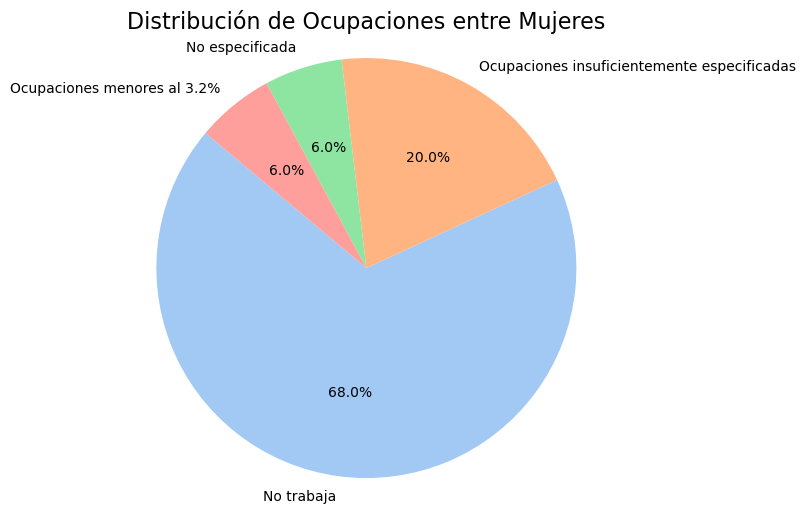

In [45]:
# Grafico Mujeres
# grafico para mujeres donde solo se presentan las 3 ocupaciones mas comunes y el resto se agrupa en 'Otros'
ocupacion_mujeres = df_limpio[df_limpio['sexo'] == 'Mujer']['ocupacion_descripcion']
ocupacion_mujeres_counts = ocupacion_mujeres.value_counts()
top_3_ocupaciones = ocupacion_mujeres_counts.head(3)
otros = ocupacion_mujeres_counts[3:].sum()
# --- NUEVA LÍNEA DE CÓDIGO AGREGADA ---
# Lista de etiquetas originales
etiquetas_originales = list(top_3_ocupaciones.index) + ['Ocupaciones menores al 3.2%']
# Formatear las etiquetas insertando '\n' donde sea necesario (ejemplo)
etiquetas_formateadas = [
    e.replace(' y ', '\ny ').replace(' en ', '\nen ')  # Se añade el salto de línea.
    for e in etiquetas_originales]
# Generar una paleta de colores con suficientes colores únicos
colores_unicos = sns.color_palette('pastel', n_colors=len(etiquetas_formateadas))
plt.figure(figsize=(8, 6))
plt.pie(
    list(top_3_ocupaciones) + [otros], 
    labels=etiquetas_formateadas, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors= colores_unicos
)
plt.title('Distribución de Ocupaciones entre Mujeres', fontsize=16)
plt.axis('equal')  # Igualar los ejes para que el pastel sea circular



plt.show()


In [46]:
map_escola = {
    'Sin escolaridad': 'Sin escolaridad',
    'Preescolar': 'Educación Básica',
    'Primaria incompleta': 'Educación Básica',
    'Primaria completa': 'Educación Básica',
    'Secundaria incompleta': 'Educación Básica',
    'Secundaria completa': 'Educación Básica',
    'Preparatoria o bachillerato incompleta': 'Educación Básica',
    'Preparatoria o bachillerato completa': 'Educación Media Superior',
    'Profesional': 'Educación Superior',
    'Posgrado': 'Educación Superior',
    'No especificado': 'No especificado',
    'No aplica menores de 3 años': 'No aplica',
    'No aplica menores 12 años': 'No aplica'
}

# crear copia si no existe o sobrescribir si editas la celda
df_esc_sex = df_limpio[['escolarida', 'sexo']].copy()
df_esc_sex['escolarida'] = df_esc_sex['escolarida'].astype('string')
df_esc_sex['subgrupo_escolaridad'] = df_esc_sex['escolarida'].map(map_escola)
df_esc_sex['subgrupo_escolaridad'] = df_esc_sex['subgrupo_escolaridad'].astype('category')

C:\Users\geile\AppData\Local\Temp\ipykernel_1500\2502383350.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_sexo_ocupacion = df_esc_sex.groupby(['sexo', 'subgrupo_escolaridad']).size().unstack(fill_value=0)


<Figure size 800x600 with 0 Axes>

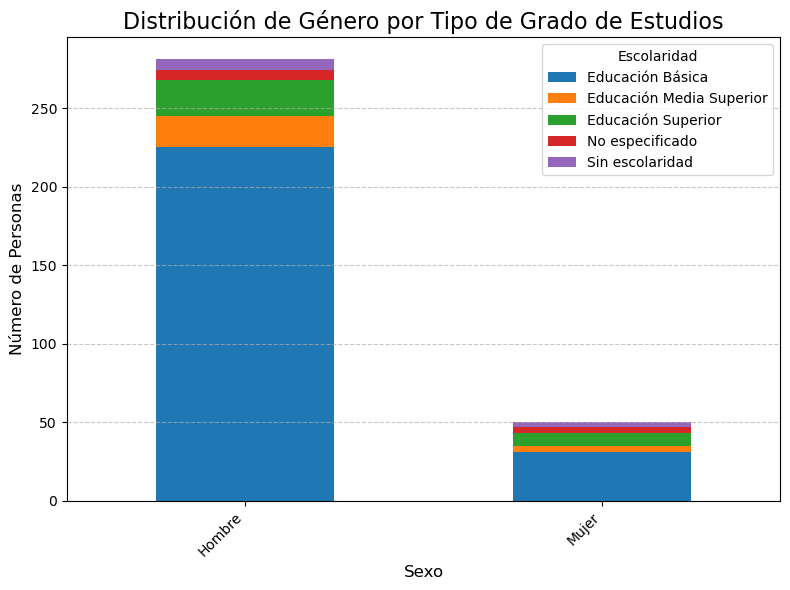

In [47]:
# Grafica apilada de escolaridad por sexo

#Agrupar por 'ocupacion' y 'sexo' y contar el número de ocurrencias.
conteo_sexo_ocupacion = df_esc_sex.groupby(['sexo', 'subgrupo_escolaridad']).size().unstack(fill_value=0)

# Crear la figura y los ejes para la gráfica
plt.figure(figsize=(8, 6))

# Generar la gráfica de barras agrupadas
conteo_sexo_ocupacion.plot(kind='bar', stacked = True, figsize=(8, 6))

# Personalizar la gráfica
plt.title('Distribución de Género por Tipo de Grado de Estudios', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Escolaridad', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje X para mayor legibilidad
plt.legend(title='Escolaridad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Ajustar el diseño para que todo quepa
#Agregar a los ejes y para ambos ejes
plt.gca().set_ylabel('Número de Personas')

plt.show()